In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import pickle

X, Y = mnist.data, mnist.target

sklearn.utils._bunch.Bunch

In [3]:
some_digit = X.loc[0]
some_digit_image = some_digit.values.reshape(28, 28)

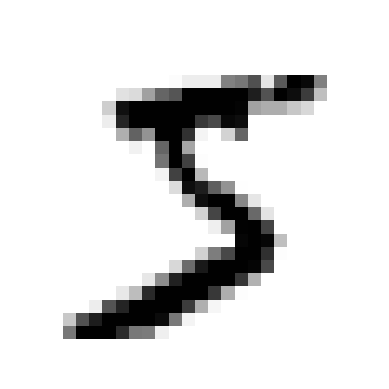

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
import numpy as np
Y = Y.astype(np.uint8)

In [6]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [7]:
y_train_5 = (Y_train == 5)
y_test_5 = (Y_test == 5)

In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

with open("sgd_clf.pkl", "wb") as f:
    pickle.dump(sgd_clf, f)

In [49]:

with open("sgd_clf.pkl", "rb") as f:
    sgd_clf = pickle.load(f)

sgd_clf.predict([some_digit])

/home/afreedi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [10]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train.loc[train_index]
#     Y_train_folds = y_train_5.loc[train_index]
#     X_test_fold = X_train.loc[test_index]
#     Y_test_fold = y_train_5.loc[test_index]

#     clone_clf.fit(X_train_folds, Y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == Y_test_fold)
#     print(n_correct / len(y_pred))

In [11]:

# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# from sklearn.model_selection import cross_val_predict
# y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# np.save("y_train_pred.npy", y_train_pred)

# def custom_cross_pred(clf, n_folds, X, y):
#     skfolds = StratifiedKFold(n_splits=n_folds)
#     result = np.array([])

#     for train_index, test_index in skfolds.split(X, y):
#         clone_clf = clone(clf)
#         X_train_folds = X.iloc[train_index]
#         Y_train_folds = y.iloc[train_index]
#         X_test_fold = X.iloc[test_index]
#         Y_test_fold = y.iloc[test_index]

#         clone_clf.fit(X_train_folds, Y_train_folds)
#         y_preds = clone_clf.predict(X_test_fold)
#         result = np.concatenate([result, y_preds > 0.5])

#     return result.astype(bool)
# y_train_pred = custom_cross_pred(sgd_clf, 3, X_train, y_train_5)

# y_train_pred

In [12]:
y_train_pred = np.load("y_train_pred.npy")

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [14]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred)) # claims an image as 5 is only true 85% of the time
print(recall_score(y_train_5, y_train_pred)) # claims an image is 5 only 65% of the time

0.8370879772350012
0.6511713705958311


precision - wrong classified as right how much percentage
recall - right classified as wrong how much percentage

if precision inc, only the very accurate data's are selected rejecting the most

In [15]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [16]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/home/afreedi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [17]:
# y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
# with open("y_decision_scores.npy", "wb") as f:
#     pickle.dump(y_scores, f)

In [18]:
with open("y_decision_scores.npy", "rb") as f:
    y_scores = pickle.load(f)

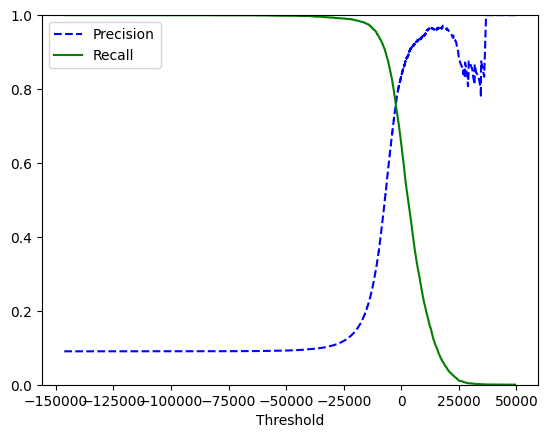

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],'b--',label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_threshold(precisions, recalls, thresholds)
plt.show()

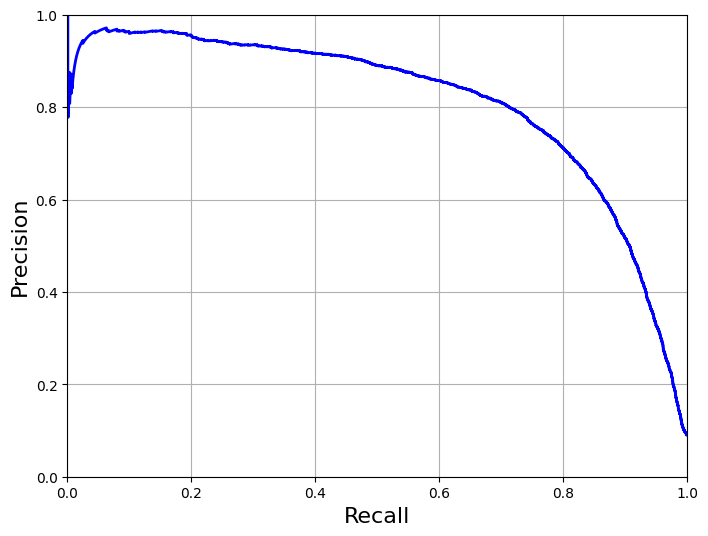

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.show()

In [21]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [22]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

In [24]:
print(recall_score(y_train_5, y_train_pred_90))
print(precision_score(y_train_5, y_train_pred_90))

0.4799852425751706
0.9000345901072293


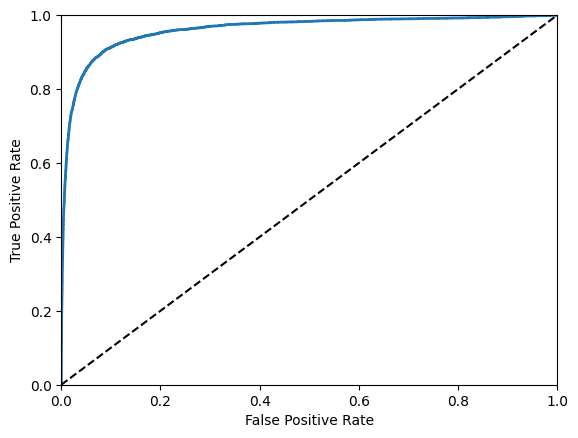

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clg = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clg, X_train, y_train_5, cv=3, method="predict_proba")

with open("y_probas_forest.npy", "wb") as f:
    pickle.dump(y_probas_forest, f)

In [29]:
with open("y_probas_forest.npy", "rb") as f:
    y_probas_forest = pickle.load(f)
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [40]:
y_scores_forest = y_probas_forest[:,1]

In [41]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

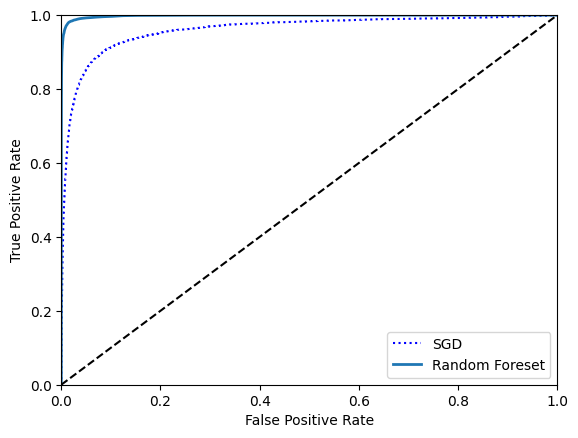

In [42]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Foreset")
plt.legend(loc="lower right")
plt.show()

In [43]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)

In [46]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

plot_precision_recall_threshold(precisions, recalls, thresholds)
plt.show()

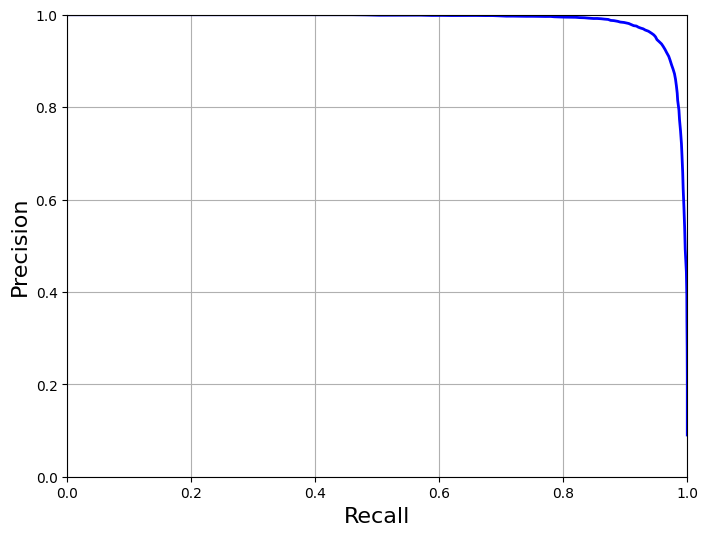

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.show()

In [50]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, Y_train)

with open("svm_clf.pkl", "wb") as f:
    pickle.dump(svm_clf, f)

In [ ]:
with open("svm_clf.pkl", "rb") as f:
    svm_clf = pickle.load(f)

In [53]:
some_digit_score = svm_clf.decision_function([some_digit])
some_digit_score

/home/afreedi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [54]:
np.argmax(some_digit_score)

5

In [55]:
print(svm_clf.classes_)
svm_clf.classes_[5]

[0 1 2 3 4 5 6 7 8 9]


5

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, Y_train)